# Improving Review Rates for Airbnb Listings in Bangkok
---

### List Of Contents: 
1. Background
2. Business Problem
3. Data Analysis Goal
4. Data Collection
4. Data Understanding
5. Data Cleaning
6. Feature Engineering
7. Exploratory Data Analysis
8. Data Analysis
9. Conclusion
10. Recommendation

## 1. Background
---
*`Airbnb (Airbed & Breakfast) was born in 2007 when two hosts welcomed three guests to their San Francisco home, and has since grown to over 5 million hosts who have welcomed over 1.5 billion guest arrivals in almost every country across the globe. Every day, hosts offer unique stays and experiences that make it possible for guests to connect with communities in a more authentic way.`* (source : https://news.airbnb.com/about-us/)

Airbnb has established itself as a prominent player in the sharing economy, transforming the hospitality industry by enabling homeowners to rent out their properties or spare rooms to travelers. This platform offers a wide variety of accommodation options, often at competitive prices compared to traditional hotels. With its emphasis on unique and personalized guest experiences, Airbnb has become a go-to choice for many travelers seeking authentic connections and stays.

As Airbnb continues to grow, its influence is particularly evident in major tourist destinations around the world. One such destination is Bangkok, the capital city of Thailand. Known for its dynamic street life, stunning cultural landmarks, and vibrant markets, Bangkok attracts millions of tourists each year, making it one of the most visited cities globally.

As one of the most visited cities globally, Bangkok's accommodation landscape is diverse, ranging from high-end hotels to budget-friendly hostels. Airbnb not only provides a place to stay but also enhances the travel experience by allowing guests to connect more authentically with the local culture. In Bangkok, this means staying in homes that reflect the city's rich history and vibrant lifestyle, providing a deeper connection to the local community. This approach to accommodation is particularly appealing in a city as diverse and dynamic as Bangkok, where every neighborhood offers something unique to discover.

## 2. Business Problem
---
In the competitive landscape of Airbnb, customers reviews are crucial for attracting guests and ensuring booking success. However, many Airbnb listings in Bangkok remain unreviewed, missing out on potential visibility and profitability. This lack of reviews hinders these properties from competing with more established listings that have numerous testimonials.

`Our goal is to understand why some listings fail to receive reviews and to develop strategies to optimize the performance of these unreviewed properties.`

This analysis will be conducted based on different areas of Bangkok, namely the inner, middle, and outer areas, in order to identify more specific recommendations.

By analyzing top-performing listings across these different areas, we aim to provide actionable recommendations for hosts to increase their listing's appeal, guest satisfaction, and ultimately, their review acquisition.

### Target Audience

1. **Hosts on Airbnb:**
<br>Primary stakeholders who own or manage properties listed on Airbnb. They aim to optimize the performance of their listings to attract more guests and increase bookings with a particular focus on strategies that might be more effective in their specific area (inner, middle, or outer Bangkok)

2. **Airbnb Platform:**
<br>The platform itself is a stakeholder, benefiting from increased engagement, higher booking rates, and improved user satisfaction. Airbnb is interested in supporting hosts to enhance the quality of listings on its platform, as it contributes to overall business growth and reputation. Understanding the dynamics of different areas in Bangkok will help Airbnb provide more tailored support to hosts.

## 3. Data Analysis Goal : 
---
To identify the key differences between unreviewed and reviewed listings in different areas of Bangkok (inner, middle, outer) and make recommendations based on these insights.

1. **Distribution of Listings:**
<br>What is the distribution of reviewed and unreviewed listings in the inner, middle, and outer areas of Bangkok?

2. **Room Type Distribution:**
<br>Which room types (entire home/apt, private room, hotel room, shared room) are more prevalent among reviewed and unreviewed listings in each area?

3. **Availability:**
<br>How does the availability of unreviewed listings compare to reviewed listings in each area (inner, middle, outer) of Bangkok?

4. **Median Minimum Nights:**
<br>Are there differences in the median minimum nights required for unreviewed and reviewed listings in each area?

5. **Price Comparison:**
<br>How do the prices of reviewed and unreviewed listings compare for each room type and area?

## 4. Data Collection
---
The data used in this project is sourced from the **'Airbnb Listings Bangkok'** dataset in csv format, provided by Purwadhika. 

#### **Dataset Dictionary**:

1. `id`: Airbnb's unique identifier for the listing.
2. `name`: name of the listings.
3. `host_id`: Airbnb's unique identifier for the host/user.
4. `host_name`: name of the host. Usually, just the first name(s).
5. `neighbourhood`: the neighbourhood is geocoded using the latitude and longitude against neighbourhoods as defined by open or public digital shapefiles.
6. `latitude`: uses the World Geodetic System (WGS84) projection for latitude and longitude.
7. `longitude`: uses the World Geodetic System (WGS84) projection for latitude and longitude.
8. `room_type`: type of listing, divided into four category, Entire Home, Private Room, Shared Room, and Hotel.
9. `price`: daily price in local currency (Bath).
10. `minimum_nights`: the minimum number of night stays for the listing.
11. `number_of_reviews`: the number of reviews the listing has.
12. `last_review`: the date of the last review/newest review.
13. `calculated_host_listings_count`: the number of listings the host has in the current scrape in the city/region geography.
14. `availability_365`: availability_x. Property availability for 365 days. It indicates how many days the property is available for rent in a year.
15. `number_of_reviews_ltm`: the number of reviews the listing has in last 12 months.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# read dataset in csv format
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## 5. Data Understanding
---

In [3]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [4]:
# check null value
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [5]:
# check duplicate data
df.duplicated().sum()

0

In [6]:
# check duplicate data without columns 'Unnamed:0' and 'id'
duplicate = df[df.duplicated(subset=['name','host_id','neighbourhood','latitude', 'longitude','room_type','price','minimum_nights','number_of_reviews','last_review','availability_365','number_of_reviews_ltm'])]
duplicate

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5976,5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaN,NaN,9,361,0
8790,8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaN,NaN,4,180,0
15186,15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaN,NaN,44,340,0
15191,15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaN,NaN,40,340,0
15550,15550,781514912980696908,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,NaN,NaN,33,360,0
15615,15615,780896408611028752,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,344327171,Alice,Huai Khwang,13.757097,100.568486,Entire home/apt,2533,3,0,NaN,NaN,40,360,0
15831,15831,790280473547745220,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,NaN,NaN,14,360,0


In [7]:
len(duplicate)

7

After conducting a duplicate check, we found that there are 7 pairs of data with the same name and identical longitude and latitude coordinates. This may occur due to the limitations of longitude and latitude coordinates in accurately defining locations. Therefore, **we will leave this data unchanged**.

In [8]:
# descriptive statistics for numerical data
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [9]:
# descriptive statistics for non numerical data
df.describe(include=object)

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


#### NOTES :
1. There are a total of 15,854 entries in the data.
2. Some column names need to be changed for better audience understanding.
3. There is an unneeded column: `'Unnamed: 0'`
4. The `'last_review'`, `'host_id'`, and `'id'` column's datatype needs to be change.
5. There are some columns with null values :
    - `'name'` has 8 rows with null values.
    - `'host_name'` has 1 row with null value.
    - `'last_review'` has 5,790 rows with null values.
    - `'reviews_per_month'` has 5,790 rows with null values.
6. There are no duplicate values.
7. There are potential error values in the data :
    - The minimum value in the `'price'` column = 0
    - The maximum value in the `'minimum_nights'` column = 1,125 nights

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

## 6. Data Cleaning
---

### 6.1. Drop `'Unnamed: 0'` Column

In [11]:
# drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

### 6.2. Rename column name

In [12]:
df.rename(columns={'id':'listings_id','name':'listings_name','price':'listings_price','reviews_per_month':'avg_reviews_month'},inplace=True)
df.head()

,listings_id,listings_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,listings_price,minimum_nights,number_of_reviews,last_review,avg_reviews_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


### 6.3. Treatment null value

- column `'listings_name'` = 8 rows with null values

In [13]:
df[df['listings_name'].isna()]

,listings_id,listings_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,listings_price,minimum_nights,number_of_reviews,last_review,avg_reviews_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


To utilize all the data, we will fill the null values in the `'listings_name'` column with 'unknown'.

In [14]:
fill_list = {439:'unknown1', 544:'unknown2', 
             572:'unknown3', 669:'unknown4', 
             1030:'unknown5', 1282:'unknown6', 
             1594:'unknown7', 2075:'unknown8'}
df.fillna({'listings_name':fill_list},inplace=True)

- column `'host_name'` = 1 row with null value

In [15]:
df[df['host_name'].isna()]

,listings_id,listings_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,listings_price,minimum_nights,number_of_reviews,last_review,avg_reviews_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


We also fill the null value in the `'host_name'` column with `'unknown'`

In [16]:
df.fillna({'host_name':'unknown'},inplace=True)

- column `'last_review'` = 5790 rows with null values
- column `'reviews_per_month'` = 5790 rows with null values

In [17]:
# check 'number_of_reviews' column values
df[df['last_review'].isna() & df['avg_reviews_month'].isna()][['number_of_reviews']].value_counts()

number_of_reviews
0                    5790
Name: count, dtype: int64

As stated in the dataset dictionary, the `'last_review'` and `'review_per_month'` columns can have null or 0 values when the listing has not received any reviews (`'number_of_reviews'` = 0). So, we will flll the null value in `'avg_reviews_month'` column with 0.

In [18]:
# fill the null value on 'avg_reviews_month' with 0
df.fillna({'avg_reviews_month' : 0}, inplace = True)

For the **'last_review'** column, we need to change the data type into datetime, so we need to fill null values with datetime data. The accomodation with a null value in **'last_review'** is assumed to have not received any reviews from the start. We will use **2 November 2012** as stated in the Wikipedia article on Airbnb: https://en.wikipedia.org/wiki/Timeline_of_Airbnb.

In [19]:
# fill the null value on 'last_review'
df.fillna({'last_review':'2012-11-02'}, inplace=True)

### 6.4. Change column data type

In [20]:
# change 'last_review' column datatype
df['last_review'] = pd.to_datetime(df['last_review'])

In [21]:
# change 'host_id' and 'listings_id' column datatype
df['host_id'] = df['host_id'].astype(str)
df['listings_id'] = df['listings_id'].astype(str)

### 6.5. Check the error values
- min value in `'price'` column = 0

In [22]:
df[df['listings_price'] == 0]

,listings_id,listings_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,listings_price,minimum_nights,number_of_reviews,last_review,avg_reviews_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,2012-11-02,0.0,1,0,0


Since there is only 1 data with a value of 0 in the `'price'` column and it is crucial to have valid data in this column, we will drop this row from our dataset.

In [23]:
df = df.drop(index=11103)
df[df['listings_price'] == 0]

,listings_id,listings_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,listings_price,minimum_nights,number_of_reviews,last_review,avg_reviews_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [24]:
# recheck data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listings_id                     15853 non-null  object        
 1   listings_name                   15853 non-null  object        
 2   host_id                         15853 non-null  object        
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15853 non-null  object        
 5   latitude                        15853 non-null  float64       
 6   longitude                       15853 non-null  float64       
 7   room_type                       15853 non-null  object        
 8   listings_price                  15853 non-null  int64         
 9   minimum_nights                  15853 non-null  int64         
 10  number_of_reviews               15853 non-null  int64         
 11  last_re

## 7. Feature Engineering
---

### 7.1. Create a new column called `'reviewed'` based on the `'number_of_reviews'`.
The data will be categorised into 2 groups :
- 'reviewed'    : number of reviews > 0
- 'unreviewed'  : number of reviews = 0.

In [25]:
# make new category based on number of review column
df['reviewed'] = np.where(df['number_of_reviews'] == 0, 'unreviewed', 'reviewed')

### 7.2. Create a column called `'area'` based on 'neighbourhood'
The neigbourhood is segmented into 3 areas (source : https://www.mdpi.com/2071-1050/14/14/8388):
- **Inner area** : <br>Chatu Chak, Bang Sue, Phaya Thai, Din Daeng, Dusit, Huai Khwang, Vadhana, Ratchathewi, Parthum Wan, Bang Rak, Sathon, Yan na wa, Bang Kho laen, Thon buri, Bangkok Yai, Bangkok Noi, Phra Nakhon, Pom Prap Sattru Phai, Samphanthawong, Khlong Toei, Khlong San.

- **Middle area**: <br>Bang Phlat, Bang Khae, Phasi Charoen, Chom Thong, Thung Khru, Rat Burana, Phra Khanong, Bang Na, Pra Wet, Suanluang, Bang Kapi, Saphan Sung, Wang Thong Lang, Khan Na Yao, Bueng Kum, Lat Phrao, Bang Khen, Sai Mai.

- **Outer area** : <br>Thawi Watthana, Taling Chan, Nong Khaem, Bang Bon, Bang Khun Thain, Don Mueang, Lak Si, Khlong Sam Wa, Nong Chok, Min Buri, Lat Krabang

In [26]:
# add new column for segmenting the neighbourhood 
# defining function to divide each neigbourhood to an area
def area(neighbourhood):
    inner = ['Chatu Chak', 'Bang Sue', 'Phaya Thai', 'Din Daeng', 'Dusit', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Parthum Wan', 'Bang Rak', 'Sathon', 'Yan na wa', 'Bang Kho laen', 'Thon buri', 'Bangkok Yai', 'Bangkok Noi', 'Phra Nakhon', 'Pom Prap Sattru Phai', 'Samphanthawong', 'Khlong Toei', 'Khlong San']
    middle =  ['Bang Phlat', 'Bang Khae', 'Phasi Charoen', 'Chom Thong', 'Thung khru', 'Rat Burana', 'Phra Khanong', 'Bang Na', 'Pra Wet', 'Suanluang', 'Bang Kapi', 'Saphan Sung', 'Wang Thong Lang', 'Khan Na Yao', 'Bueng Kum', 'Lat Phrao', 'Bang Khen', 'Sai Mai']
    outer = ['Thawi Watthana', 'Taling Chan', 'Nong Khaem', 'Bang Bon', 'Bang Khun thain', 'Don Mueang', 'Lak Si', 'Khlong Sam Wa', 'Nong Chok', 'Min Buri', 'Lat Krabang']
    if neighbourhood in inner:
        return 'Inner'
    elif neighbourhood in middle:
        return 'Middle'
    elif neighbourhood in outer:
        return 'Outer'
    else : return 'Unknown'

# Apply the function to create a new column
df['area'] = df['neighbourhood'].apply(area)

## 8. Exploratory Data Analysis
---

In [27]:
# define variabel to store numerical column
numerical_cols = df.select_dtypes(include=['int','float']).columns[2:].tolist() # not including 'latitute' and 'longitude'

In [28]:
# define variabel to store categorical column
categorical_cols = df.select_dtypes(include=['object']).columns[1:].tolist() # not including 'listings_id'

### 8.1. Data distribution and identify outlier using boxplot for numerical data

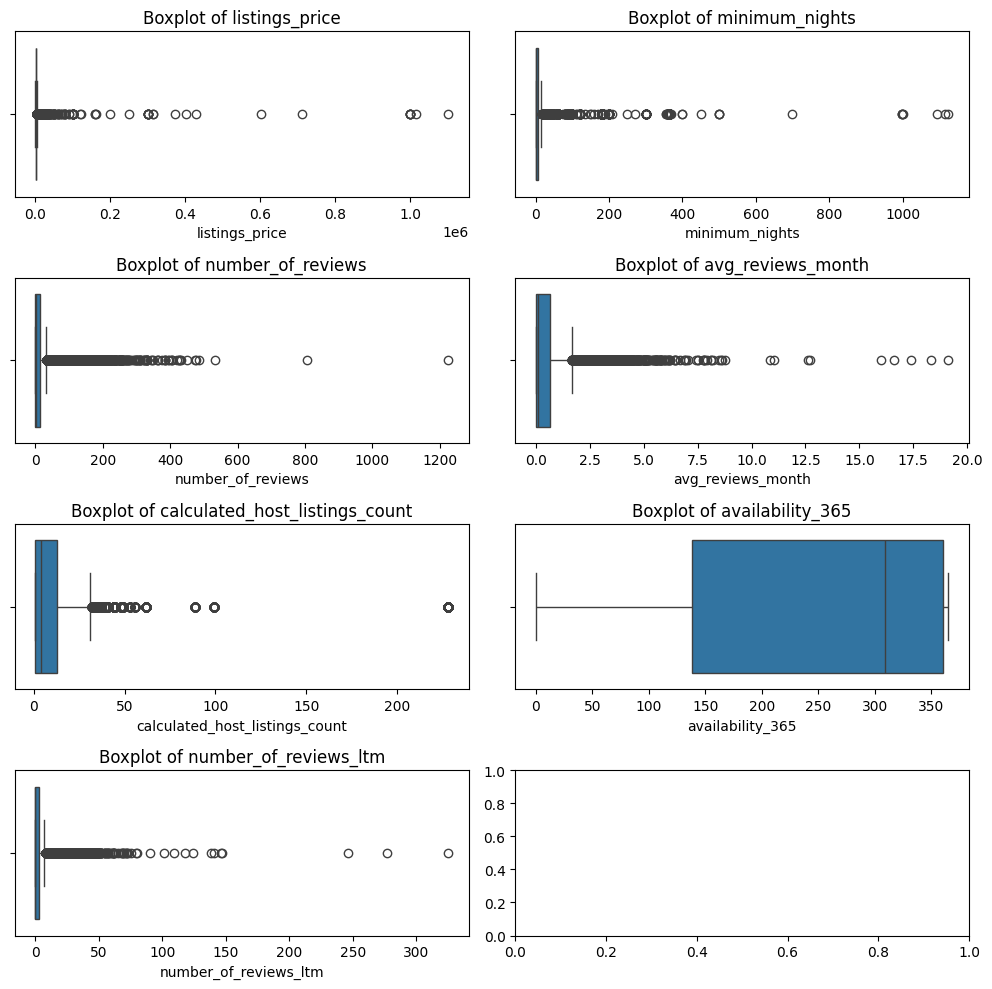

In [29]:
fig,axes = plt.subplots(4,2,figsize=(10,10))

for i, cols in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[cols], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {cols}')

plt.tight_layout()
plt.show()

The boxplot diagram indicates that the numerical data in the dataframe has a right-skewed distribution, with the exception of the column `'availability_365'`. Additionally, some columns have outliers, so we need to calculate the IQR (Interquartile Range) to calculate the number of outliers.

#### IQR (Interquartile Range)

In [30]:
# define function to calculate IQR and outlier
def IQR_outlier(data, col):
    Q1 = data[col].quantile(1/4)
    Q3 = data[col].quantile(3/4)
    IQR = Q3 - Q1
    outlier_lower = Q1 - 1.5 * IQR
    outlier_upper = Q3 + 1.5 * IQR
    total_outliers = len(data[(data[col] < outlier_lower) | (data[col] > outlier_upper)])
    outlier_percentage = round(total_outliers / len(data[col]) * 100, 2)
    return outlier_lower, outlier_upper, total_outliers, outlier_percentage

In [31]:
# define an empty list to store function result
outlier = []
for col in numerical_cols:
    lower_band, upper_band, total_outliers, outlier_percentage = IQR_outlier(df, col)
    outlier.append([col, lower_band, upper_band, total_outliers, outlier_percentage])

In [32]:
# turn the outlier list into a dataframe
outlier_info_df = pd.DataFrame(outlier, columns=["Columns", "Lower Band", "Upper Band", "Total Outliers", "Percentage of Outliers (%)"])
outlier_info_df

,Columns,Lower Band,Upper Band,Total Outliers,Percentage of Outliers (%)
0,listings_price,-1393.500,4722.500,1403,8.85
1,minimum_nights,-8.000,16.000,3168,19.98
2,number_of_reviews,-19.500,32.500,2240,14.13
3,avg_reviews_month,-1.005,1.675,1471,9.28
4,calculated_host_listings_count,-17.000,31.000,1832,11.56
5,availability_365,-195.000,693.000,0,0.00
6,number_of_reviews_ltm,-4.500,7.500,2219,14.00


Even though 4 of the numerical column have outliers more than 10% of the data, we will retain all outliers in this project. This approach allows us to gain valuable insights for our analysis.

### 8.2. Correlation test

#### - Correlation for numerical column : (Spearman)

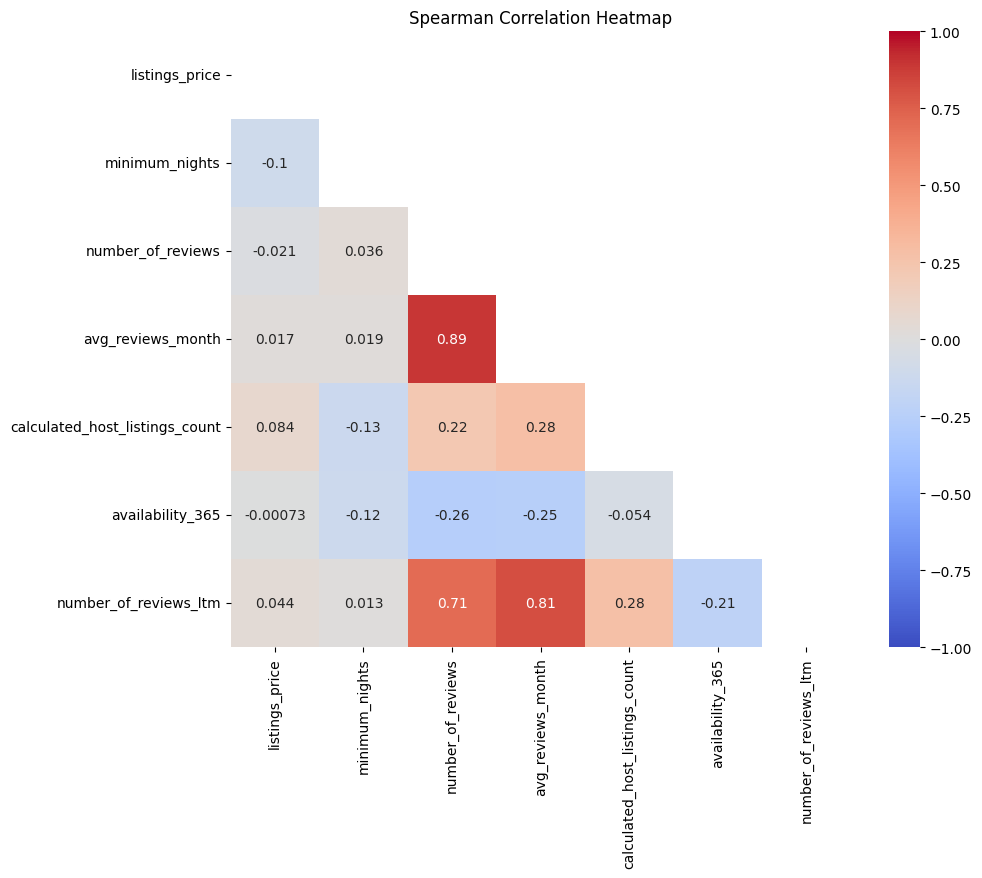

In [33]:
# Spearman correlation test
corr = df[numerical_cols].corr(method='spearman')
mask = np.triu(corr)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

The heatmap indicates a significant positive correlation between the following variables:
- `'avg_reviews_month'`, `'number_of_reviews'`, and `'number_of_reviews_ltm'` (because of multicolinearity)

There are low correlation between :
- `'calculated_host_listings_count'` with `'number_of_reviews'`, `'number_of_review_ltm'` and `'avg_reviews_month'` (positive correlation)
- `'availability_365'` with `'minimum_nights'`, `'number_of_reviews'`, and `'avg_reviews_month'` (negative correlation)

However, no significant correlation was observed between any other variables.

#### - Correlation for categorical column : (chi-square)

In [34]:
# chi-square test
def chi_square(col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    stat,pvalue,dof,expected_freq = chi2_contingency(contingency_table)
    if pvalue < 0.05:
        print(f"pvalue = {pvalue}, is lesser than alpha 0.05. Sufficient evidence to reject Ho.")
        print(f"Column <{col1}> and <{col2}> are DEPENDANTS.\n")
    else :
        print(f"pvalue = {pvalue}, is greater than alpha 0.05. Not enough evidence to reject Ho.")
        print(f"Column <{col1}> and <{col2}> are INDEPENDANTS.\n")
        

for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        chi_square(categorical_cols[i], categorical_cols[j])

pvalue = 0.0, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <listings_name> and <host_id> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <listings_name> and <host_name> are DEPENDANTS.

pvalue = 4.387493073739608e-272, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <listings_name> and <neighbourhood> are DEPENDANTS.

pvalue = 5.0281199900656964e-20, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <listings_name> and <room_type> are DEPENDANTS.

pvalue = 0.0006728847968380511, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <listings_name> and <reviewed> are DEPENDANTS.

pvalue = 3.380086572999612e-15, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <listings_name> and <area> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <host_id> and <host_name> are DEPENDANTS.

pvalue = 0.0, is le

The chi-square test results indicate that all categorical columns are dependent on all other columns, demonstrating a significant association between them.

In [35]:
df.head()

,listings_id,listings_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,listings_price,minimum_nights,number_of_reviews,last_review,avg_reviews_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviewed,area
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,reviewed,Inner
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,2012-11-02,0.00,2,358,0,unreviewed,Middle
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,2012-11-02,0.00,1,365,0,unreviewed,Middle
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,reviewed,Inner
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,2012-11-02,0.00,3,365,0,unreviewed,Middle


In [36]:
# save the clean data into new csv file
df.to_csv("airbnb_clean.csv",index=False)

In [37]:
df_clean = pd.read_csv('airbnb_clean.csv')

## 9. Data Analysis
---

In [38]:
# check the clean data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15853 entries, 0 to 15852
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listings_id                     15853 non-null  int64  
 1   listings_name                   15853 non-null  object 
 2   host_id                         15853 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15853 non-null  object 
 5   latitude                        15853 non-null  float64
 6   longitude                       15853 non-null  float64
 7   room_type                       15853 non-null  object 
 8   listings_price                  15853 non-null  int64  
 9   minimum_nights                  15853 non-null  int64  
 10  number_of_reviews               15853 non-null  int64  
 11  last_review                     15853 non-null  object 
 12  avg_reviews_month               

In [39]:
# csv file do not store datatype, so we need to change datatype again

# change 'last_review' column datatype
df_clean['last_review'] = pd.to_datetime(df['last_review'])

# change 'host_id' and 'listings_id' column datatype
df_clean['host_id'] = df_clean['host_id'].astype(str)
df_clean['listings_id'] = df_clean['listings_id'].astype(str)

In [40]:
# check the quantity of reviewed and unreviewed listings
df_clean['reviewed'].value_counts()

reviewed
reviewed      10064
unreviewed     5789
Name: count, dtype: int64

### 1. Compare unreviewed listings with reviewed listings to identify key differences

In [41]:
# groupby data by 'reviewed', 'area', and 'room_type'
df_area = df_clean.groupby(by=['reviewed','area']).agg({
    'listings_id':'count',
    'listings_price':'median',
    'minimum_nights':'median',
    'number_of_reviews':'median',
    'availability_365':'median'
}).rename(columns={'listings_id': 'num_of_listings'}).reset_index()
df_area

,reviewed,area,num_of_listings,listings_price,minimum_nights,number_of_reviews,availability_365
0,reviewed,Inner,8233,1500.0,2.0,9.0,270.0
1,reviewed,Middle,1517,920.0,2.0,5.0,291.0
2,reviewed,Outer,314,850.0,1.0,5.0,335.5
3,unreviewed,Inner,4078,1600.0,1.0,0.0,351.0
4,unreviewed,Middle,1378,1190.0,1.0,0.0,357.0
5,unreviewed,Outer,333,1000.0,1.0,0.0,363.0


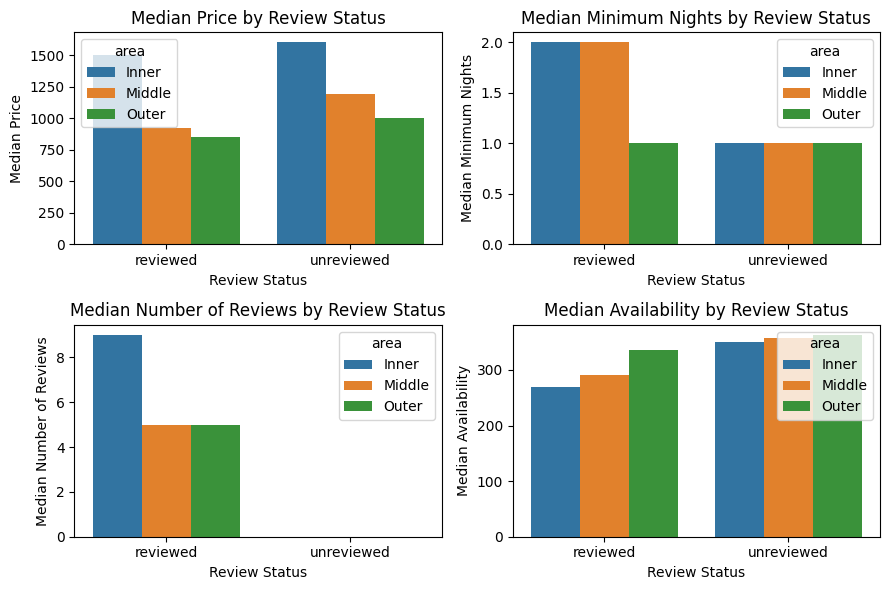

In [42]:
# visualize
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# 1: Median listings price for reviewed and unreviewed listings
sns.barplot(data=df_clean, x='reviewed', y='listings_price', estimator='median',hue='area',errorbar=None,ax=axes[0,0])
axes[0, 0].set_title('Median Price by Review Status')
axes[0, 0].set_xlabel('Review Status')
axes[0, 0].set_ylabel('Median Price')

# 2: Median minimum nights for reviewed and unreviewed listings
sns.barplot(data=df_clean, x='reviewed', y='minimum_nights', estimator='median',hue='area',errorbar=None,ax=axes[0,1])
axes[0, 1].set_title('Median Minimum Nights by Review Status')
axes[0, 1].set_xlabel('Review Status')
axes[0, 1].set_ylabel('Median Minimum Nights')

# 3: Median number of reviews for reviewed and unreviewed listings
sns.barplot(data=df_clean, x='reviewed', y='number_of_reviews',estimator='median',hue='area',errorbar=None, ax=axes[1,0])
axes[1, 0].set_title('Median Number of Reviews by Review Status')
axes[1, 0].set_xlabel('Review Status')
axes[1, 0].set_ylabel('Median Number of Reviews')

# 4: Median availability for reviewed and unreviewed listings
sns.barplot(data=df_clean, x='reviewed', y='availability_365',estimator='median',hue='area',errorbar=None, ax=axes[1,1])
axes[1, 1].set_title('Median Availability by Review Status')
axes[1, 1].set_xlabel('Review Status')
axes[1, 1].set_ylabel('Median Availability')

plt.tight_layout()
plt.show()

Review of the data in the table and bar plot indicates that : 
- Reviewed listing tends to have lower Availability and Listings Prices. 
- Median Minimum Nights for reviewed listing in inner and middle area is higher than unreviewed listings in the same area.
- For reviewed listings, the median Number of Reviews is higher in inner area.
- The majority of unreviewed listings are located in the inner area, followed by the middle area and the outer area.

### 2. Compare by the room type for unreviewed listings and reviewed listings to identify key differences

**- Number of Listing by Room Type per Area**

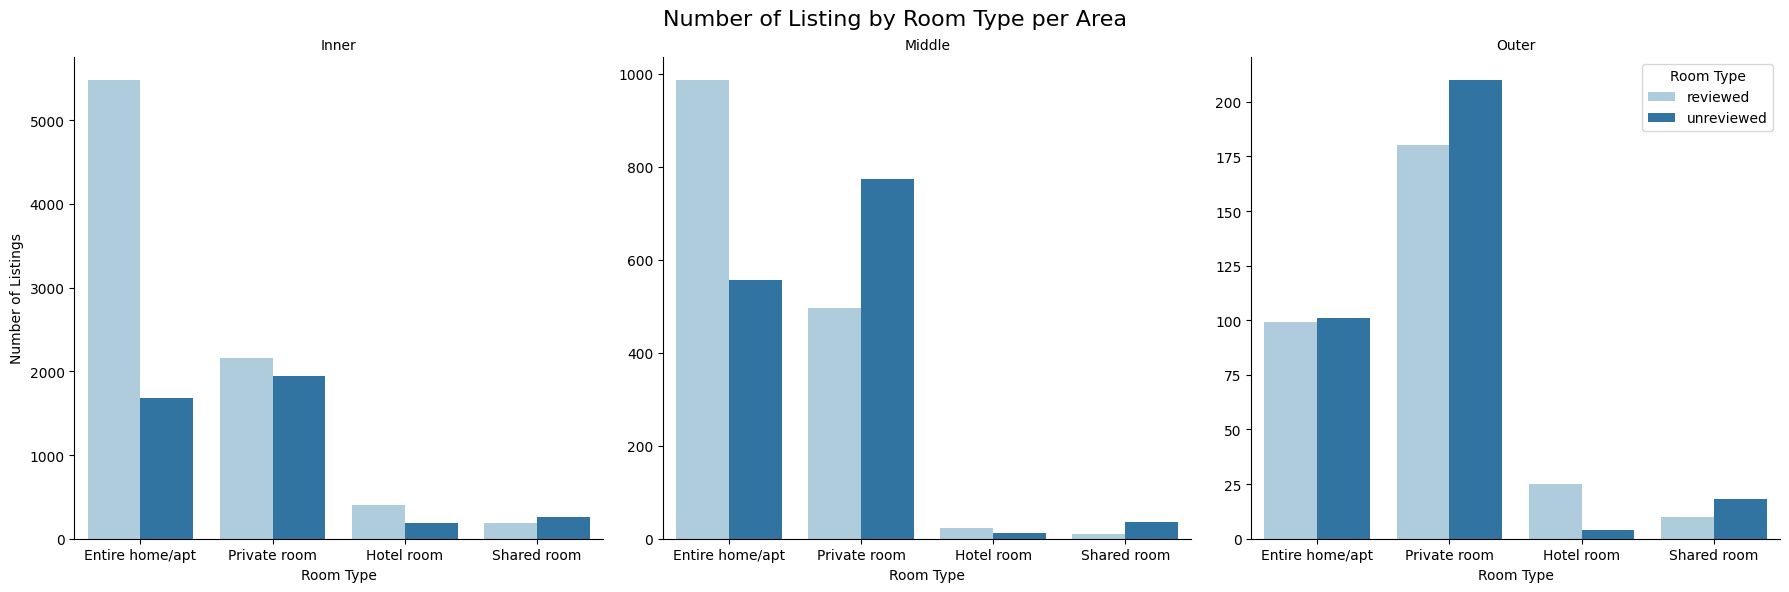

In [43]:
# barplot to show count of listings by room type per area
viz = sns.FacetGrid(df_clean, col='area', col_wrap=3, height=6, sharey=False)
ord = ['reviewed','unreviewed']
viz.map_dataframe(sns.barplot, x='room_type', y='listings_price',estimator='count', hue='reviewed', hue_order=ord, palette='Paired', errorbar=None)
viz.set_axis_labels('Room Type', 'Number of Listings')
viz.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
plt.suptitle('Number of Listing by Room Type per Area', fontsize=16)
plt.legend(title='Room Type')
plt.show()

Reviewed listings number by room type :
- The majority of the reviewed listings in the inner and middle areas are dominated by entire home/apt, followed by private rooms, hotel rooms, and shared rooms.
- The outer area saw the greatest number of private rooms, followed by entire home/apt, hotel rooms, and shared rooms.

Unreviewed listings number by room type :
- Unreviewed listings in all area are dominated by private room, followed by entire home/apt, shared room, and hotel room.

**- Listings Price by Room Type per Area**

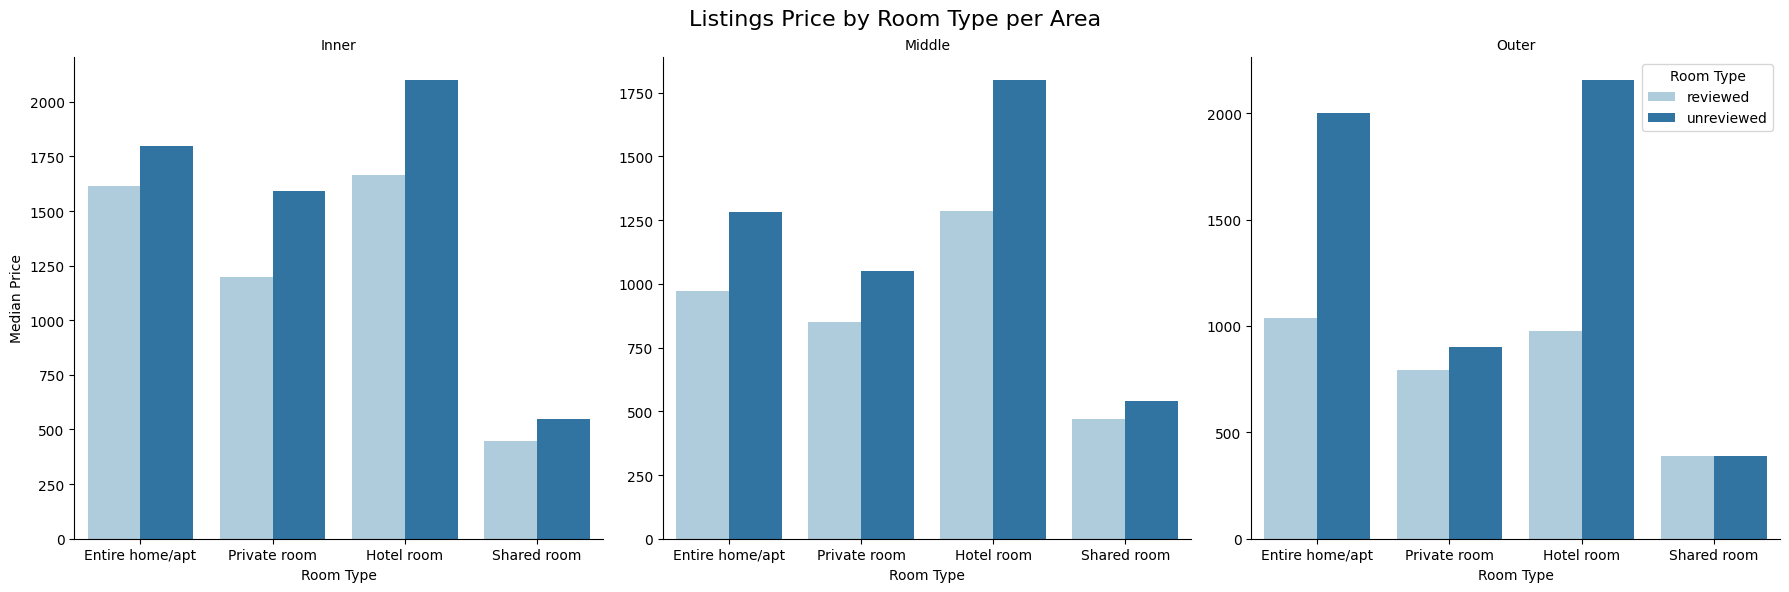

In [44]:
# subplot for listings price by room type per area
viz = sns.FacetGrid(df_clean, col='area', col_wrap=3, height=6, sharey=False)
ord = ['reviewed','unreviewed']
viz.map_dataframe(sns.barplot, x='room_type', y='listings_price',estimator='median', hue='reviewed', hue_order=ord, palette='Paired', errorbar=None)
viz.set_axis_labels('Room Type', 'Median Price')
viz.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
plt.suptitle('Listings Price by Room Type per Area', fontsize=16)
plt.legend(title='Room Type')
plt.show()

Review of data in the barplot indicates :
- In all room types and areas, unreviewed listings have a median price that is higher than that of reviewed listings.
- For all areas, hotel rooms have the highest price, followed by entire home/apt, private rooms, and shared rooms.
- The price for hotel rooms and entire home/apt room types in unreviewed listings in the outer area is significantly higher than the reviewed ones.

**- Median Minimum Nights by Room Type per Area**

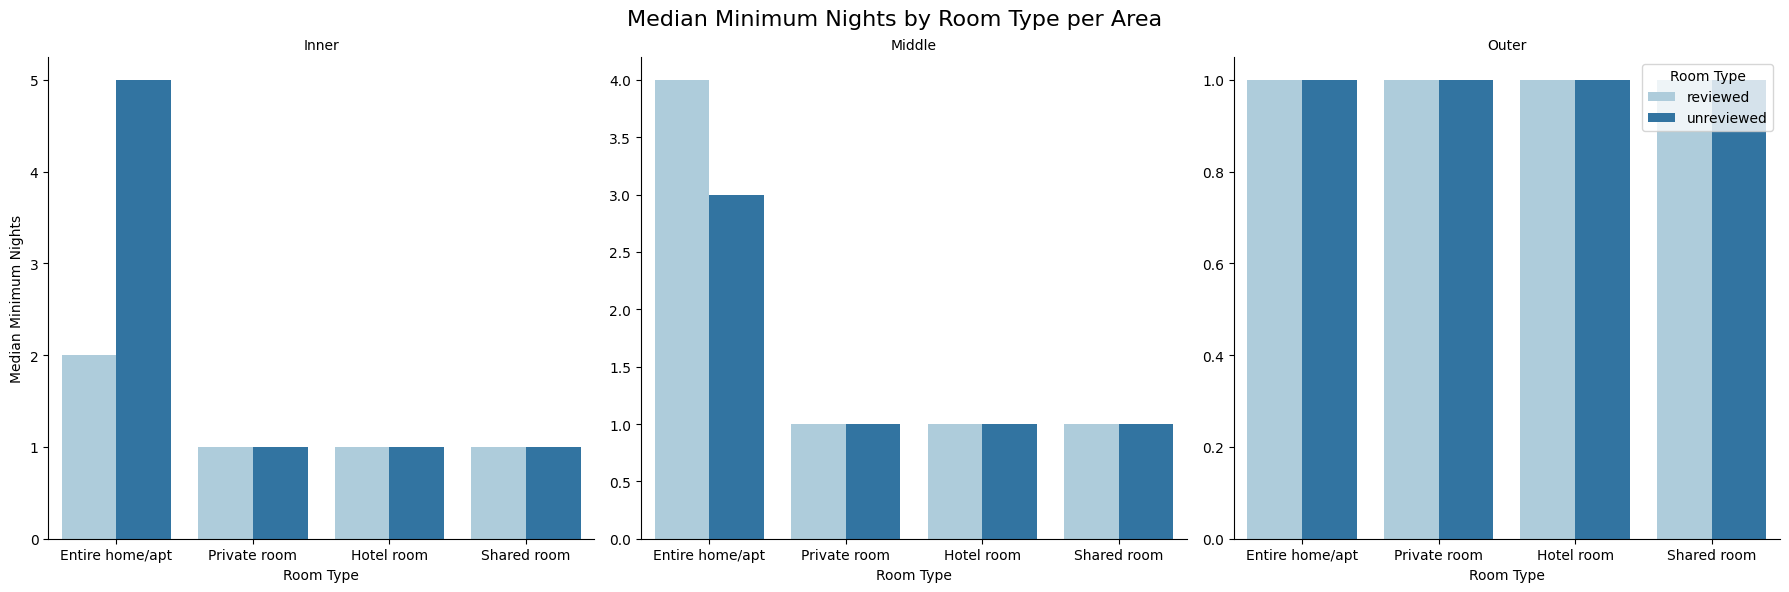

In [45]:
# subplot for minimum nights by room type per area
viz = sns.FacetGrid(df_clean, col='area', col_wrap=3, height=6, sharey=False)
ord = ['reviewed','unreviewed']
viz.map_dataframe(sns.barplot, x='room_type', y='minimum_nights',estimator='median', hue='reviewed', hue_order=ord, palette='Paired', errorbar=None)
viz.set_axis_labels('Room Type', 'Median Minimum Nights')
viz.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
plt.suptitle('Median Minimum Nights by Room Type per Area', fontsize=16)
plt.legend(title='Room Type')
plt.show()

Based on the graph, most of the reviewed and unreviewed lisitngs have same median minimum nights except for entire home/apt in inner and middle area.

**- Total Number of Reviews by Room Type per Area**

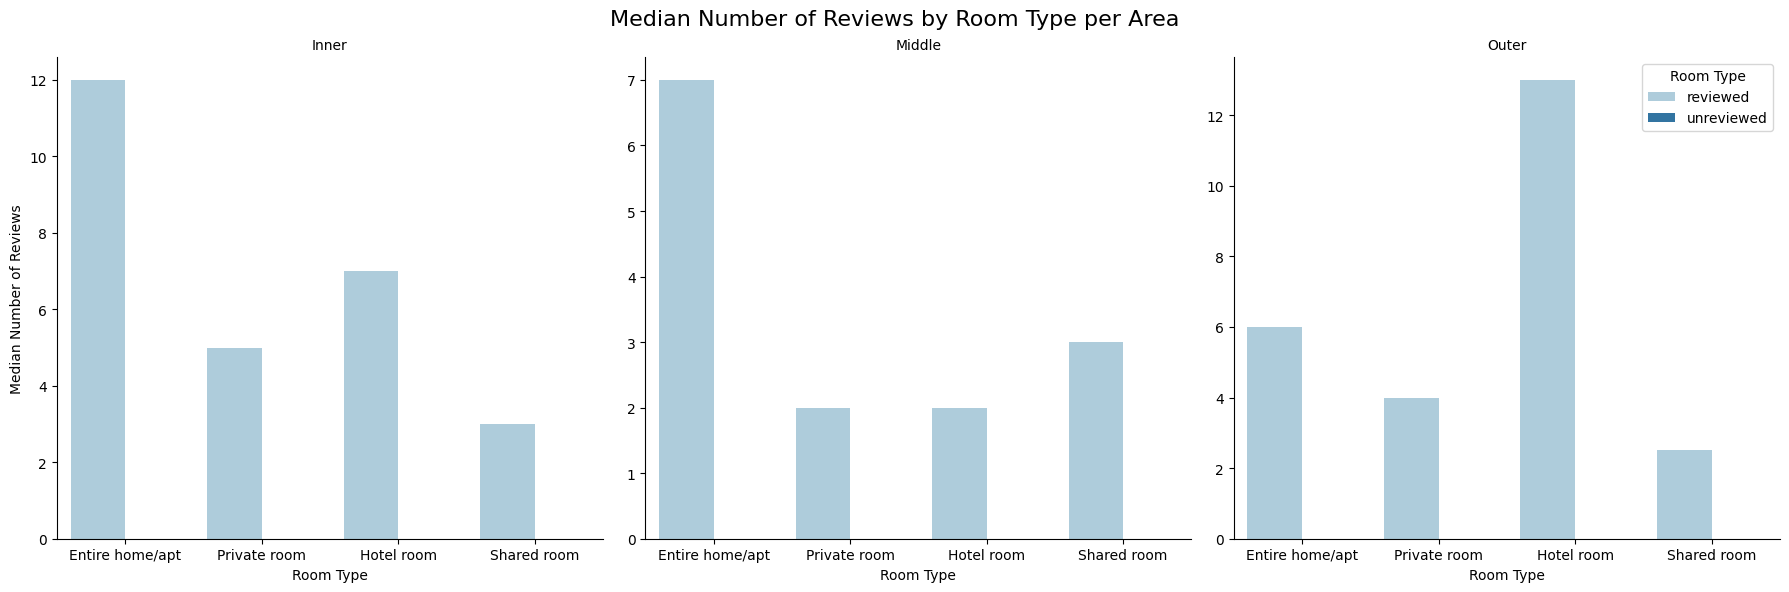

In [46]:
# visualization for Number of Reviews by room type per area
viz = sns.FacetGrid(df_clean, col='area', col_wrap=3, height=6, sharey=False)
ord = ['reviewed','unreviewed']
viz.map_dataframe(sns.barplot, x='room_type', y='number_of_reviews',estimator='median', hue='reviewed', hue_order=ord, palette='Paired', errorbar=None)
viz.set_axis_labels('Room Type', 'Median Number of Reviews')
viz.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
plt.suptitle('Median Number of Reviews by Room Type per Area', fontsize=16)
plt.legend(title='Room Type')
plt.show()

Median number of reviews for reviewed listings :
- In the inner area, the entire home/apt has the highest median number of reviews, followed by hotel room, private room, and shared room. 
- In middle areas, the number of reviews is far higher for entire home/apt, followed by shared room, hotel room and private room.
- In the outer area, hotel room has the highest number of reviews, followed by entire home/apt, private room, and shared room.

**- Median Availability by Room Type per Area**

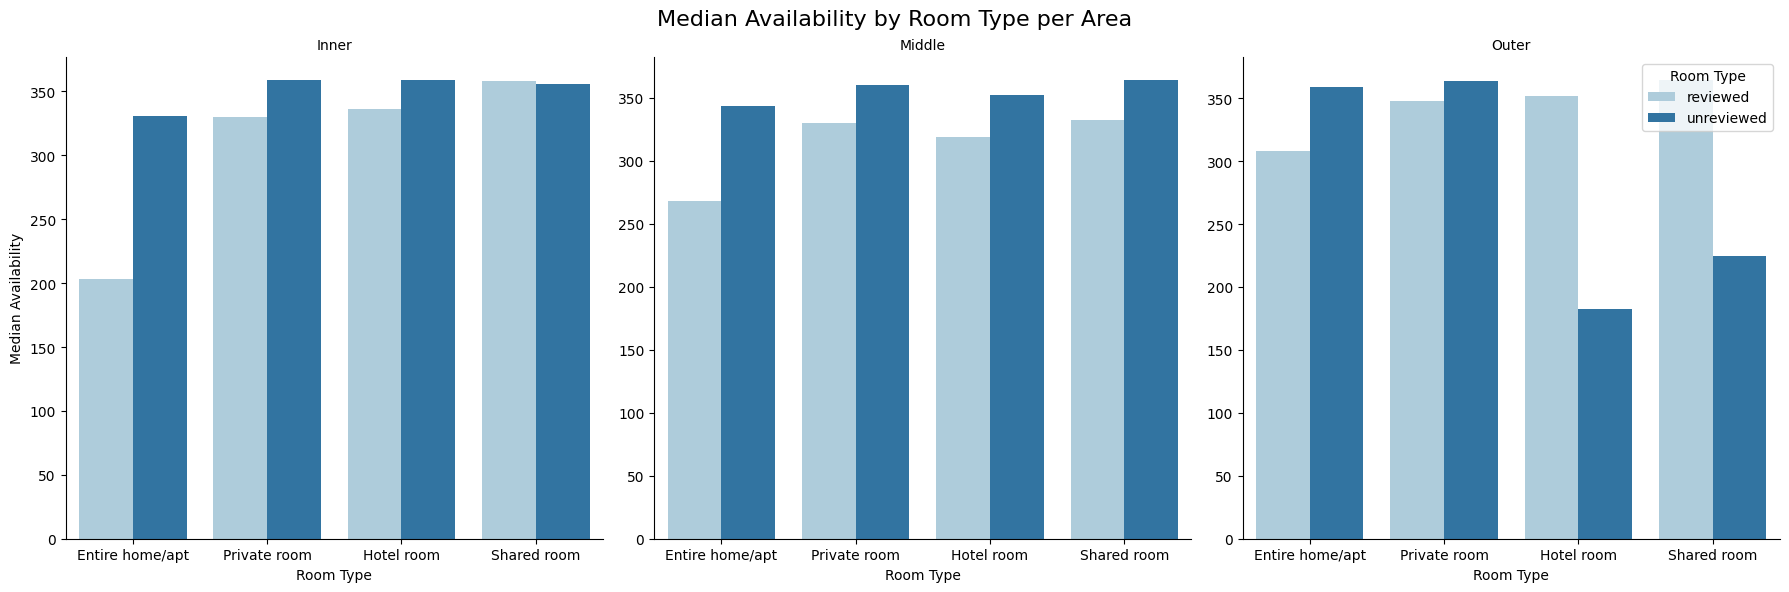

In [47]:
# subplot for availability by room type per area
viz = sns.FacetGrid(df_clean, col='area', col_wrap=3, height=6, sharey=False)
ord = ['reviewed','unreviewed']
viz.map_dataframe(sns.barplot, x='room_type', y='availability_365',estimator='median', hue='reviewed', hue_order=ord, palette='Paired', errorbar=None)
viz.set_axis_labels('Room Type', 'Median Availability')
viz.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
plt.suptitle('Median Availability by Room Type per Area', fontsize=16)
plt.legend(title='Room Type')
plt.show()

Reviewed listings :
- In the inner area, the entire home/apt has the lowest median availability, followed by private rooms, hotel rooms and shared rooms.
- In the middle area, the entire home/apt has the lowest median availability, followed by hotel rooms, private rooms and shared rooms.
- In the outer area, the entire home/apt has the lowest median availability, followed by private rooms, hotel rooms and shared rooms.

Unreviewed listings :
- In the inner area, the lowest median availability is for entire home/apt, followed by shared room, private room and hotel room.
- In the middle area, the lowest median availability is for entire home/apt, followed by hotel room, private room, and shared room (the same as the reviewed ones).
- In the outer area, hotel room has the lowest median availability, followed by shared room, entire home/apt and private room.

### 3. Check correlation of numerical feature

In [48]:
df_area

,reviewed,area,num_of_listings,listings_price,minimum_nights,number_of_reviews,availability_365
0,reviewed,Inner,8233,1500.0,2.0,9.0,270.0
1,reviewed,Middle,1517,920.0,2.0,5.0,291.0
2,reviewed,Outer,314,850.0,1.0,5.0,335.5
3,unreviewed,Inner,4078,1600.0,1.0,0.0,351.0
4,unreviewed,Middle,1378,1190.0,1.0,0.0,357.0
5,unreviewed,Outer,333,1000.0,1.0,0.0,363.0


In [49]:
# define variabel to store numerical feature
num_area = df_area.select_dtypes(include=['int','float']).columns[:].to_list()

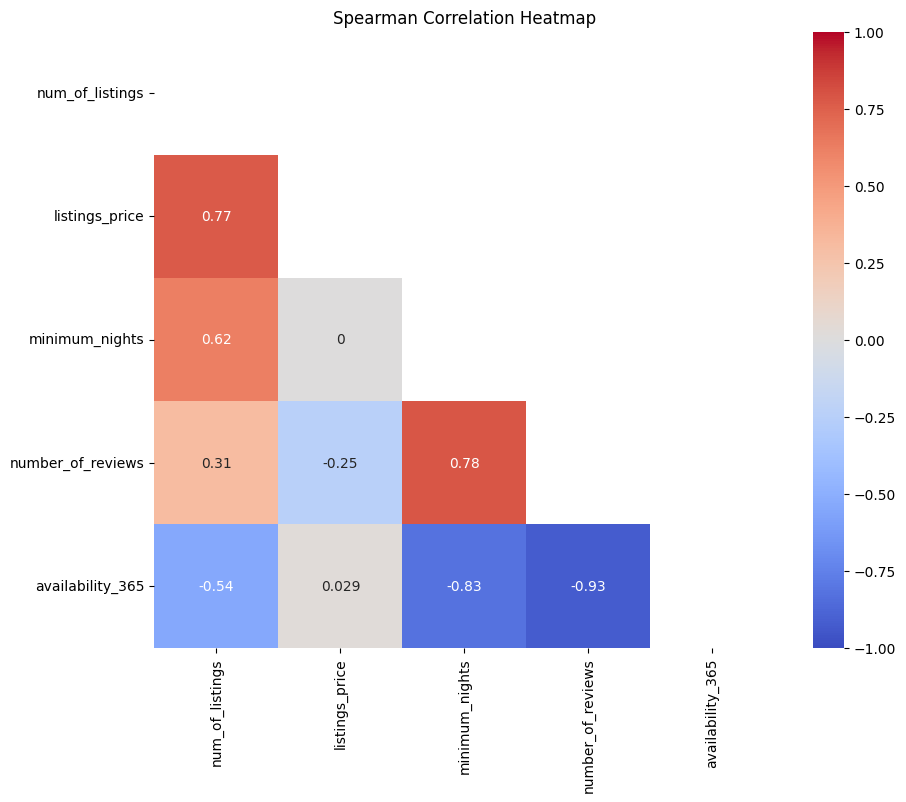

In [50]:
# Spearman correlation test
corr = df_area[num_area].corr(method='spearman')
mask = np.triu(np.ones_like(corr))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

Correlation after data is grouped by `'reviewed'` and `'area'` :
- **strong negative correlation** between :
    - `'number_of_reviews'` and `'availability_365'` (-0.93)
    - `'minimum_nights'` and `'availability_365'` (-0.83)
- **strong positive correlation** between :
    - `'listings_price'` and `'num_of_listings'` (0.77)
    - `'number_of_reviews'` and `'minimum_nights'` (0.78)
- moderate positive correlation between :
    - `'num_of_listings'` and `'number_of_reviews'` (0.31)
    - `'num_of_listings'` and `'minimum_nights'` (0.62)
- moderate negative correlation between :
    - `'num_of_listings'` and `'availability_365'` (-0.54)
- weak negative correlation between `'number_of_reviews'` and `'listings_price'` (-0.25).

## 10. Conclusion
---

Based on the analysis, several key differences and patterns have been identified between reviewed and unreviewed listings:

1. **Distribution of Listings:**
- The number of listings has a moderate positive correlation (0.31) with the number of reviews. This suggests that area with more number of listings tend to receive more reviews.
- Both reviewed and unreviewed listings are mostly located in the inner area, indicating high demand for central locations.

2. **Room Type Distribution:**
- Reviewed listings in the inner and middle areas are dominated by entire home/apt, while unreviewed ones mostly offer private room. This suggests that entire home/apt are more popular and possibly preferred by guests in these areas.
- The median number of reviews for reviewed listings also indicates that entire home/apt dominate in the inner and middle areas.

3. **Availability:**
- Availability has a strong negative correlation (-0.93) with the number of reviews. This means that higher availability is associated with fewer reviews.
- Reviewed listings generally have lower availability than unreviewed listings, which might indicate higher booking rates. This suggests that availability is a critical factor in receiving reviews, as lower availability can mean higher occupancy and thus more opportunities to get guest reviews.
- In both the inner and middle areas, entire home/apt have the lowest availability, indicating they are the most popular room type.

4. **Median Minimum Nights:**
- Minimum nights have a strong positive correlation (0.78) with the number of reviews. This means that listings with higher minimum night requirements tend to receive more reviews.
- Reviewed listings in the inner and middle areas have higher median minimum nights compared to unreviewed ones. This could indicate that guests prefer longer stays in these areas, possibly due to location-specific factors such as proximity to attractions or business centers.

5. **Price Comparison:**
- Listings price has a weak negative correlation (-0.25) with the number of reviews. This means that higher prices are slightly associated with fewer reviews.
- Unreviewed listings are priced higher than reviewed ones across all room types and areas. This could imply that high prices may be a barrier to booking, preventing these listings from receiving reviews.

## 11. Recommendations
---

**For Hosts on Airbnb Bangkok (especially hosts of unreviewed listings) :**

1. **Optimize Room Types:** 
<br>Consider the distribution of room types that are performing well in each area. If possible, adjust the room type offered to match those that are more popular in the area. Consider offering entire home/apt in the inner and middle areas if feasible, as these room types are more popular and preferred by guests.

2. **Flexible Minimum Nights:**
<br>Set a reasonable minimum night stay based on area characteristics to attract guests. In the inner and middle areas, consider adjusting minimum night requirements to align with guest preferences for longer stays. Offering discounts for longer stays might also attract more guests.

3. **Optimize Availability:**
<br>Even though reviewed listings tend to have lower availability, indicating they are booked more frequently, hosts need to ensure their listing is available for more days throughout the year to increase the possibility of the listing being booked..

4. **Adjust Pricing Strategy:**
<br>Lower the median price of unreviewed listings to make them more competitive with the reviewed ones, which could attract more bookings and improve the likelihood of receiving reviews.

5. **Enhance Guest Engagement:**
<br>Provide excellent experiences and services to guests, including prompt communication, personalized touches, and proactive assistance. Encourage guests to leave reviews by following up with a thank-you message and a gentle reminder to share their experience.

6. **Analyze Competitor Strategies:**
<br>Regularly analyze competitor listings to understand their pricing, availability, and listing descriptions. This can help to adjust your strategies to be more competitive.

**For Airbnb team :**

1. **Host Support Program:**
<br>Create and promote programs specifically designed to boost the visibility of unreviewed listings. For example, introduce a "New Listing Boost" program that temporarily prioritizes new or unreviewed listings in search results to help them gain initial traction.

2. **Proactive Support for At-Risk Listings:**
<br>Airbnb could further enhance their support by proactively reaching out to hosts with unreviewed or underperforming listings, offering tailored advice and strategies for improvement.

3. **Review Incentive System:** 
<br>Implement a system that encourages guests to leave reviews by offering small incentives, such as Airbnb credits or discount vouchers, for providing feedback on their stays. This can increase the review rate for all listings, including unreviewed ones.